In [2]:
d=[]
with open('facebook-links.txt','r') as f:
    data=f.readlines()
    print data[0].split()
    #for i in data:
        #print i
        #print i.strip().split()
        #d.append(i.strip().split())

['1', '2', '\\N']


In [3]:
import networkx as nx
gr=nx.Graph()
for i in data:
    temp=i.split()
    gr.add_edge(int(temp[0]),int(temp[1]))

In [4]:
nx.write_gml(gr,'gr1.gml')

In [5]:
gr

In [9]:
print nx.info(gr)

Name: 
Type: Graph
Number of nodes: 63731
Number of edges: 817090
Average degree:  25.6418


In [10]:
%%time
#import useful packages, all of them are important but not necessarily used in this code
#enable inline plotting in Python Notebook
#supress warnings

%pylab inline
import networkx as nx
import numpy as np
import matplotlib
import scipy
import warnings
warnings.filterwarnings('ignore')
import time

Populating the interactive namespace from numpy and matplotlib
CPU times: user 648 ms, sys: 201 ms, total: 849 ms
Wall time: 1.03 s


/Users/vnnsrk/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [15]:
g1=gr
node=g1.order()
edge=g1.size()

In [30]:
nodes = list(g1.nodes())

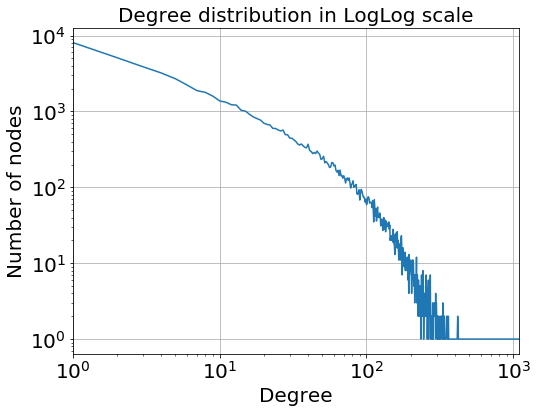

Average degree= 25.6414360133


In [69]:
deg=g1.degree()
d=list(np.zeros((node+1), dtype=np.int))
temp=list(np.zeros((node+1), dtype=np.int))
for k in range(node):
    d[k+1]= deg[k+1]
for k in range(node):
    temp[k+1]=k+1
degList=dict(zip(temp,d))
for k in g1.nodes():
    g1.node[k]['deg'] = degList[k]
deg_values = sorted(set(degList.values()))
deg_hist = [degList.values().count(x) for x in deg_values]
plt.figure(figsize=(8,6))
plt.grid(True)
plt.loglog(deg_values, deg_hist) #degree
plt.xlabel('Degree',fontsize=20)
plt.ylabel('Number of nodes',fontsize=20)
plt.title('Degree distribution in LogLog scale',fontsize=20)


plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)


plt.xlim([0, max(degList.values())])
plt.show()
plt.close()
print "Average degree=",mean(degList.values())

In [55]:
def deg_dist(g1,normalized=0,loglog=0):
    node=g1.order()
    edge=g1.size()
    deg=g1.degree()
    d=list(np.zeros((node+1), dtype=np.int))
    temp=list(np.zeros((node+1), dtype=np.int))
    for k in range(node):
        d[k+1]= deg[k+1]
    for k in range (node):
        temp[k+1]=k+1
    degList=dict(zip(temp,d))
    for k in g1.nodes():
        g1.node[k]['deg'] = degList[k]
    deg_values = sorted(set(degList.values()))
    deg_hist = [degList.values().count(x) for x in deg_values]

    plt.figure(figsize=(8,6))
    plt.grid(True)
    plt.loglog(deg_values, deg_hist) #degree
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    plt.title('Degree Distribution in LogLog scale')
    plt.xlim([0, max(degList.values())])
    plt.show()
    plt.close()

    if normalized:
        plt.figure(figsize=(8,6))
        plt.hist(degList.values(),normed=True,log=True)
        plt.gca().set_xscale("log")
        plt.xlabel('Degree')
        plt.ylabel('Number of nodes')
        plt.title('Normalized degree distribution in LogLog scale')
        plt.show()
        plt.close()
    
    if(loglog):
        plt.figure(figsize=(8,6))
        plt.grid(True)
        plt.plot(deg_values, deg_hist) #degree
        plt.xlabel('Degree')
        plt.ylabel('Number of nodes')
        plt.title('Decimal scale - Degree Distribution')
        plt.xlim([0, max(degList.values())])
        plt.show()
        plt.close()

        if normalized:
            plt.figure(figsize=(8,6))
            plt.hist(degList.values(),normed=True)
            plt.xlabel('Degree')
            plt.ylabel('Number of nodes')
            plt.title('Decimal scale - Normalized degree distribution')
            plt.show()
            plt.close()
    print "Average degree = ",np.mean(degList.values())

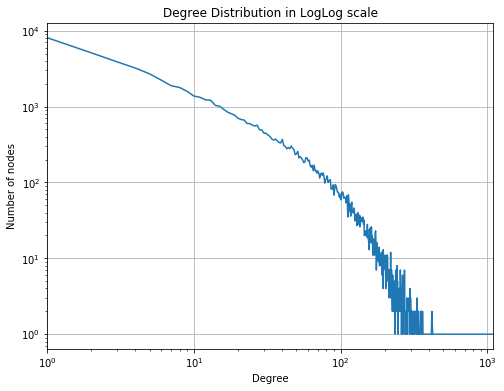

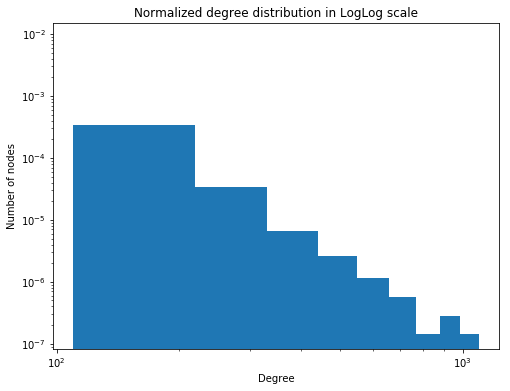

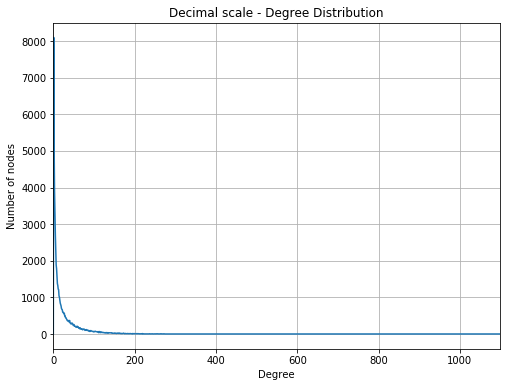

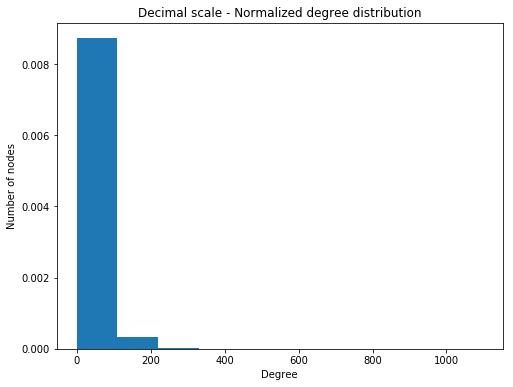

Average degree =  25.6414360133


In [56]:
deg_dist(gr,1,1)

In [66]:
def aspl(g1):
    
    print "Graph not connected"
    diameter=nx.diameter(g1)
    print "Network diameter=",diameter
    aspl=nx.average_shortest_path_length(g1)
    print "Average Shortest path length=",aspl

In [81]:
gTl=list(nx.connected_component_subgraphs(g1))
print "Graph not connected"

Graph not connected


In [87]:
gt=gTl[0]

In [88]:
gt.size()

816886

In [89]:
diameter=nx.diameter(gt)
print "Network diameter=",diameter

KeyboardInterrupt: 

In [90]:
aspl=nx.average_shortest_path_length(gT)
print "Average Shortest path length=",aspl

KeyboardInterrupt: 

In [72]:
def clus(g1):
    cc=nx.clustering(g1)
    cc_values = sorted(set(cc.values()))
    cc_hist = [cc.values().count(x) for x in cc_values]
    plt.figure(figsize=(10,8))
    plt.grid(True)
    plt.plot(cc_values, cc_hist)
    plt.xlabel('Clustering Coefficient',fontsize=20)
    plt.ylabel('Number of nodes',fontsize=20)
    plt.title('Network Clustering Coefficient distribution',fontsize=20)
    plt.xlim([0, 1])

    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.show()
    plt.close()
    print "Average Clusterng Coefficient=",mean(cc.values())

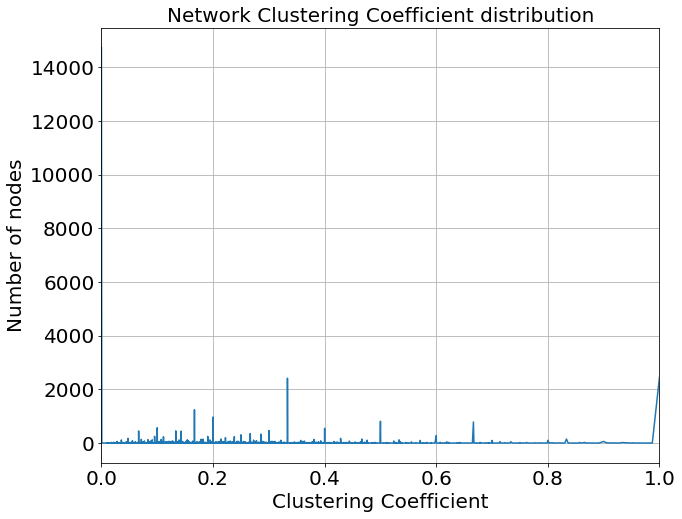

Average Clusterng Coefficient= 0.220993676912


In [73]:
clus(g1)